<a href="https://colab.research.google.com/github/PBHPBH/Machine_Learning/blob/NLP/3_%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#그래프에서 한글표현을 위해 폰트 설치
%config InlineBackend.figure_format = 'retina' # 폰트가 깨끗하게 보이도록 설정
!apt install fonts-nanum # 나눔 폰트 설치
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumMyeongjo')
mpl.font_manager._rebuild()

#한글의 올바른 인식을 위해 런타임 > 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


In [ ]:
#형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1
!pip install rhinoMorph

In [ ]:
cd /content/gdrive/MyDrive/pytest

/content/gdrive/MyDrive/pytest


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
print(len(data))
print(len(data[0]))
print(data[0])
print(data[0:3])

500
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1'], ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1']]


In [ ]:
import rhinoMorph

In [ ]:
rn = rhinoMorph.startRhino()

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!


In [ ]:
#형태소 분석된 문장 샘플 보기. eomi=True 옵션 사용->빈도 분석
sample_data = rhinoMorph.onlyMorph_list(rn, data[0][1],pos=['NNP', 'NNG', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = True)

In [ ]:
print('sample data:', sample_data)#형태소의 분석 결과
print('joined sample data:', ' '.join(sample_data))#문자열을 공백으로 연결한다
### 이제 영어와 유사한 상태가 되었다

sample data: ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
joined sample data: 어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ


In [ ]:
#ㅋㅋ? 어근인가?

In [ ]:
#전체 데이터 형태소 분석
morphed_data = ''
for data_each in data:
    morphed_data_each = rhinoMorph.onlyMorph_list(
        rn, data_each[1], pos=['NNP', 'NNG', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = True
    )
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:
        morphed_data += data_each[0]+'\t'+joined_data_each+'\t'+data_each[2]+'\n'

# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt', encoding = 'cp949')#한글을 영어와 같은 형태로 만듬 -> 이제 형태소 분석은 그만두고 기존의 알고리즘을 이용하여 분석한다.

In [ ]:
data = read_data('ratings_morphed.txt', encoding = 'cp949')
print(len(data))#492(일부는 내용이 남지 않아 제외됨)
print(len(data[0]))#3개의 원소(컬럼)

data_text = [line[1] for line in data]#데이터 본문
data_senti = [line[2] for line in data]#데이터 긍부정부분(1: 긍정 0: 부정)

494
3


In [ ]:
####################################################################################

In [ ]:
#counter 연습
from collections import Counter
count = Counter(['여름', '과일', '딸기', '과일', '딸기'])
result = count.most_common(2)

print(result)
print(result[0])
print(result[0][0])
print(result[0][1])

[('과일', 2), ('딸기', 2)]
('과일', 2)
과일
2


In [ ]:
##########################################################################################

In [ ]:
data_text_freq = Counter(data_text)# 안좋은 방법, 한문장 단위로 나뉜 리스트를 바로 처리 시도
print('data_text:', data_text_freq)# 데이터를 바로 카운트하면 각 줄이 하나의 종류로 카운트된다.

mergedText = ' '.join(data_text)#좋은 방법, 공백을 추가하여 일단 모든 리스트 요소들을 결합한다.
print('mergedText:', mergedText)

mergedTextList = mergedText.split(' ')#결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만든다
print('mergedTextList:', mergedTextList)

wordInfo = Counter(mergedTextList)#하나의 리스트로 묶인 분리된 요소들을 카운트한다(내림차순)
print('wordInfo', wordInfo)

data_text: Counter({'굿': 3, '재미있다': 2, '최고': 2, '보다': 2, '디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사': 1, '폴리스스토리 시리즈 뉴 없다 최고': 1, '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화': 1, '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화': 1, '사랑 해보다 사람 처음 끝 웃다 있다 영화': 1, '완전 감동 다시다 감동': 1, '개들 전쟁 나오다 나오다 1빠 보다': 1, '바보 병': 1, '나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다': 1, '고질라 무 귀엽다 ㅋㅋ': 1, '영화 오페라 작품 극단적 평 갈리다 어쩌다 없다': 1, '반전 좋다 ^^': 1, '평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다': 1, '네고시에이터 소재 같다 아무런 관련 없다': 1, '단연 최고': 1, '가다 갈수록 더욱 빠지다 밀회 화이팅': 1, '어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품': 1, '오랜만 보다 제대로 되다 범죄 스릴러': 1, '그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태': 1, '마지막 씬 잊다 없다': 1, '강압적 용서 세뇌 용서 대하다 비판': 1, '중세 시대 명작 굿 평점 왜 이러하다': 1, '시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작': 1, '사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다': 1, '인간 잠재 되다 악마 여러 시간 공간 속 

In [ ]:
##########################################################################################

In [ ]:
#Sorted 연습
sample = {'여름':1, '과일': 2, '딸기':3}

print(sorted(sample))
print(sorted(sample, reverse=True))#역순 정렬
print(sorted(sample, key=sample.get, reverse=True))#sample.get의 출력된 값을 기준으로 sample을 정렬

print(sorted(sample.values(), reverse=True))

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[3, 2, 1]


In [ ]:
#################################################################################################

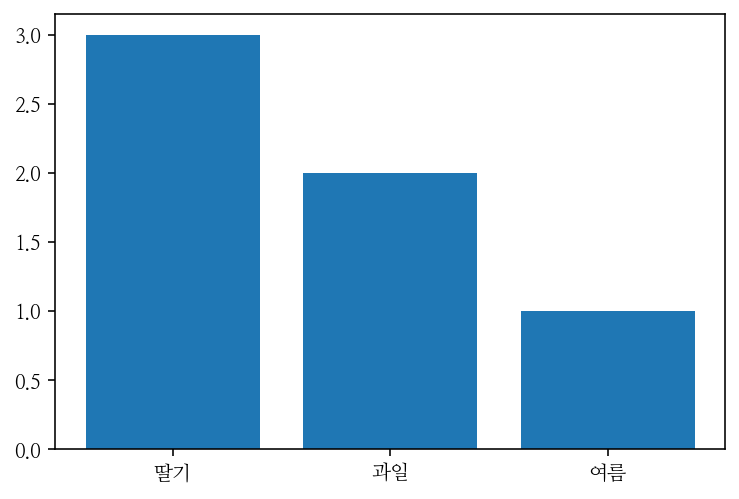

In [ ]:
#bar 그래프 연습
wordInfo_sample = Counter({'여름':1, '과일':2, '딸기':3})
sorted_keys_sample = sorted(wordInfo_sample, key=wordInfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordInfo_sample.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(len(wordInfo_sample)), sorted_values_sample)
plt.xticks(range(len(wordInfo_sample)), sorted_keys_sample)
plt.show()